In [1]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "winemag-data-130k-v2.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zynicide/wine-reviews",
  file_path
)

<ipython-input-1-1525670069>:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 16.4M/16.4M [00:00<00:00, 101MB/s] 

Extracting zip of winemag-data-130k-v2.csv...


In [2]:
sample_text = ["I love fruits", "I hate fruits"]
# Usando o modelo paraphrase-multilingual-mpnet-base-v2
from sentence_transformers import SentenceTransformer
# Experimente com um modelo diferente, por exemplo:
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(sample_text, show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding_2d = pca.fit_transform(embeddings)
print(embedding_2d)

[[ 1.6440527e+00 -8.9691078e-08]
 [-1.6440526e+00 -8.9691085e-08]]


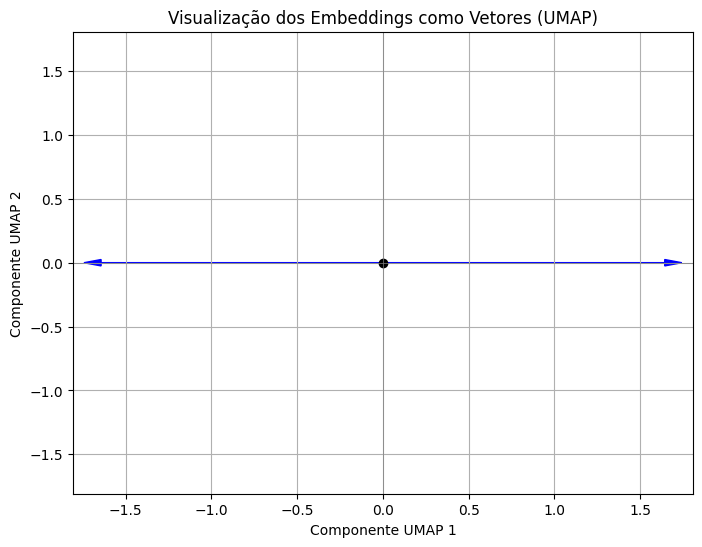

Similaridade de cosseno entre o primeiro e o segundo vetor: -1.0


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Crie uma nova figura para o gráfico
plt.figure(figsize=(8, 6))

# Desenhe o ponto de origem
plt.plot(0, 0, 'o', color='black')

# Desenhe as setas para cada embedding
for i in range(len(embedding_2d)):
    # Desenhe a seta do ponto de origem (0,0) para as coordenadas do embedding
    plt.arrow(0, 0, embedding_2d[i, 0], embedding_2d[i, 1], head_width=0.05, head_length=0.1, fc='blue', ec='blue')

# Adicione rótulos aos eixos
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")

# Adicione um título
plt.title("Visualização dos Embeddings como Vetores (UMAP)")

# Defina limites para os eixos para garantir que a origem (0,0) seja visível e as setas se encaixem
max_val = np.max(np.abs(embedding_2d)) * 1.1 # Aumenta um pouco os limites
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

# Adicione linhas de grade (opcional)
plt.grid(True)

# Adicione eixos passando pela origem (opcional)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

# Exiba o gráfico
plt.show()
from sklearn.metrics.pairwise import cosine_similarity

# Como cosine_similarity espera uma lista de vetores,
# precisamos garantir que nossos vetores bidimensionais estejam em um formato adequado.
# Se embedding_2d for uma array NumPy de forma (n_amostras, n_caracteristicas), já está pronto.

# Calcule a matriz de similaridade de cosseno
# O resultado será uma matriz onde o elemento (i, j) é a similaridade entre o vetor i e o vetor j
cosine_sim_matrix = cosine_similarity(embedding_2d)

# Para obter a similaridade entre o primeiro e o segundo vetor:
cosine_sim_0_1 = cosine_sim_matrix[0, 1]

print(f"Similaridade de cosseno entre o primeiro e o segundo vetor: {cosine_sim_0_1}")